In [105]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import itertools
%matplotlib inline


EX. 1

In [7]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [14]:
print "liczba data pointów to", len(titanic)

liczba data pointów to 891


In [15]:
print "w pierwszej klasie było", sum(titanic["pclass"] == 1)

w pierwszej klasie było 216


In [20]:
print "w kolumnie age liczba nulli to", sum(titanic["age"].isnull())

w kolumnie age liczba nulli to 177


In [26]:
print "przetrwalo {}% osób".format(100.0 * sum(titanic["survived"]) / len(titanic))

przetrwalo 38.3838383838% osób


array([[<matplotlib.axes.AxesSubplot object at 0x7fb115c420d0>]], dtype=object)

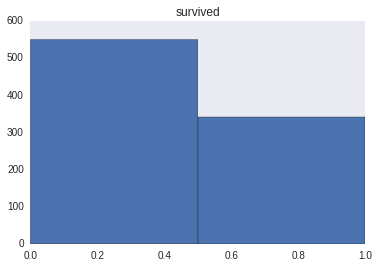

In [33]:
titanic.hist(column="survived", grid=False, bins=2)

In [37]:
print "przetrwalo {}% mężczyzn".format(100.0 * sum(titanic.loc[titanic["sex"] == "male"]["survived"]) / len(titanic.loc[titanic["sex"] == "male"]))
print "przetrwalo {}% kobiet".format(100.0 * sum(titanic.loc[titanic["sex"] == "female"]["survived"]) / len(titanic.loc[titanic["sex"] == "female"]))

przetrwalo 18.8908145581% mężczyzn
przetrwalo 74.2038216561% kobiet


EX. 2

In [103]:
import seaborn as sns

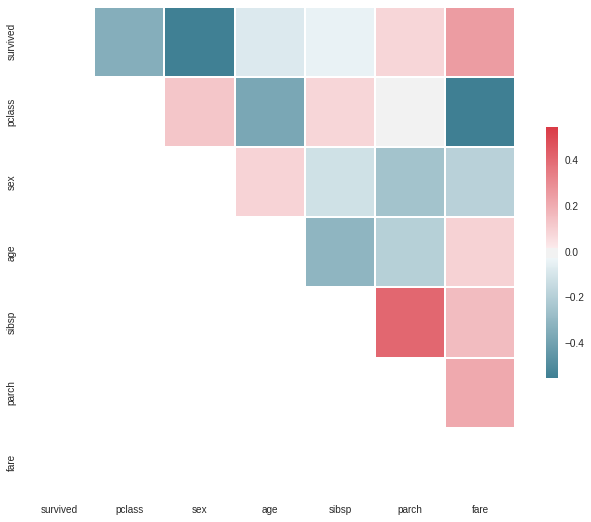

In [172]:
sns.set(style="white")

# Compute the correlation matrix
titanic = pd.read_csv("titanic.csv")
titanic['sex'] = titanic['sex']=="male"
corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3,
            square=True,
            linewidths=.5, 
            cbar_kws={"shrink": .5}, 
            ax=ax,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

EX. 3

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


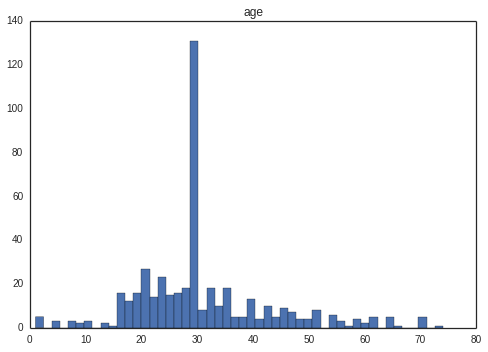

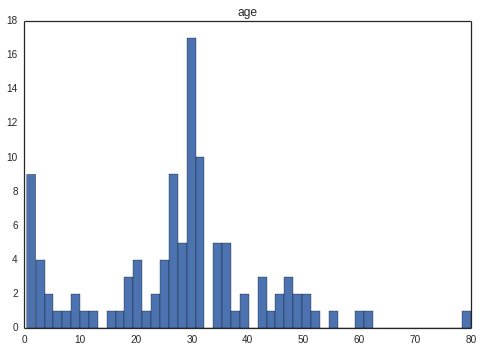

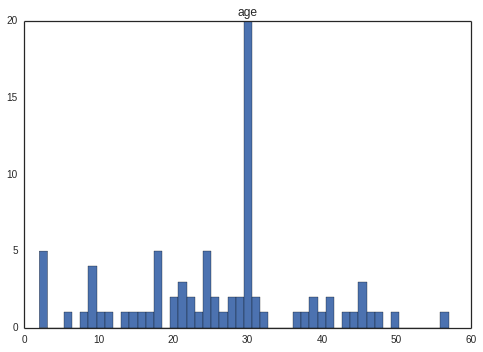

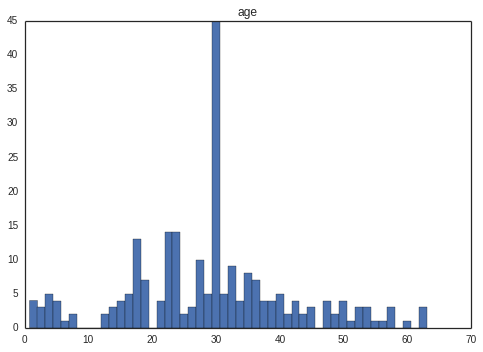

In [161]:
titanic = pd.read_csv("titanic.csv")
titanic['age'][titanic['age'].isnull()] = titanic['age'].mean()
titanic['embarked'][titanic['embarked'].isnull()] = "N"
for sex, sur in itertools.product(["male", "female"], [0, 1]):
    titanic.loc[(titanic["sex"] == sex)].loc[(titanic["survived"] == sur)].hist(column="age", bins=50, grid=False)

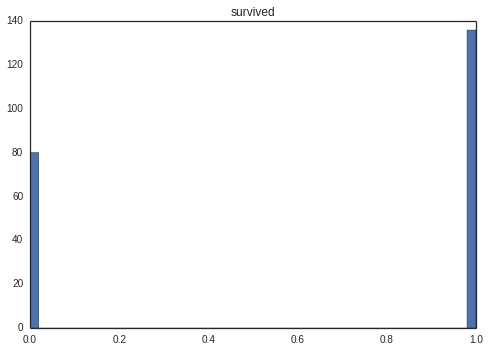

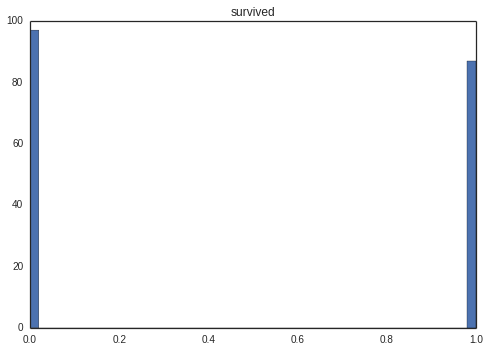

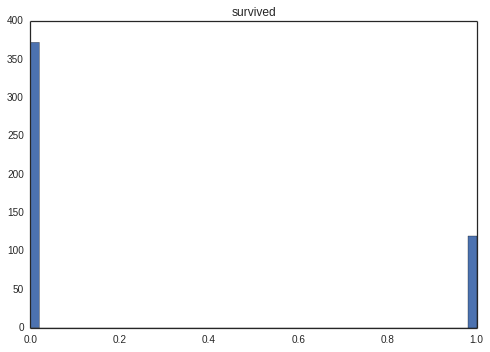

In [162]:
for pc in [1, 2, 3]:
    titanic.loc[(titanic["pclass"] == pc)].hist(column="survived", bins=50, grid=False)

0
1
2
3
4
5
8


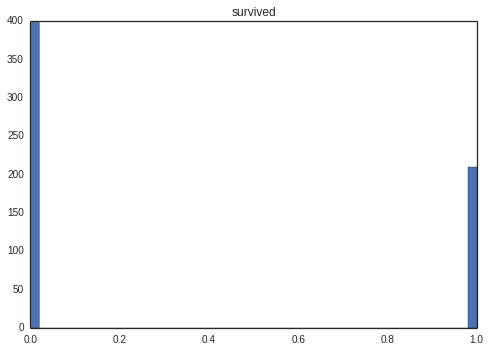

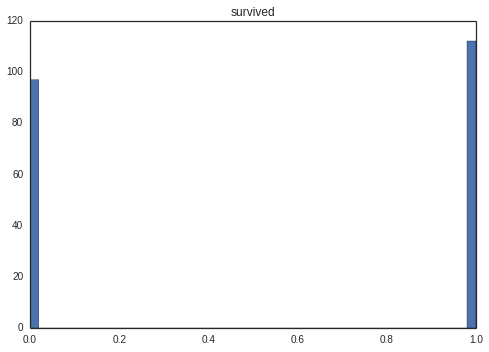

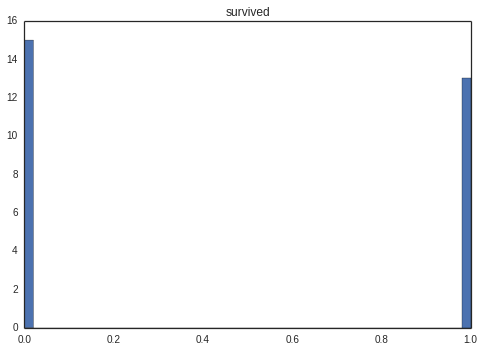

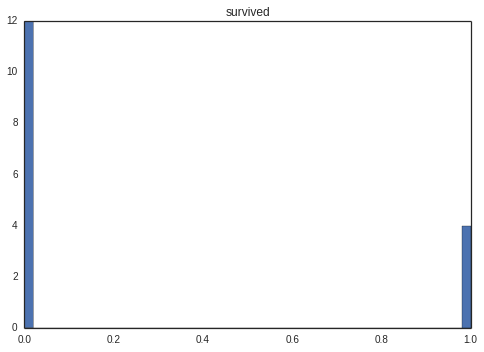

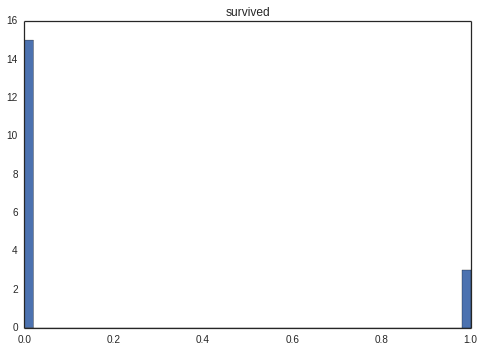

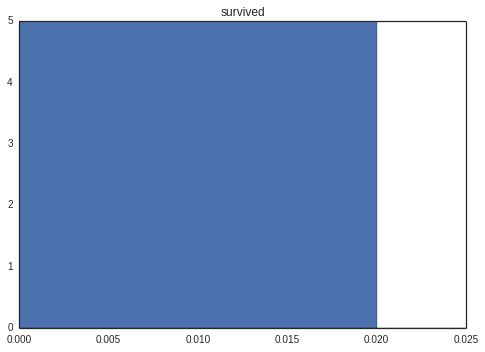

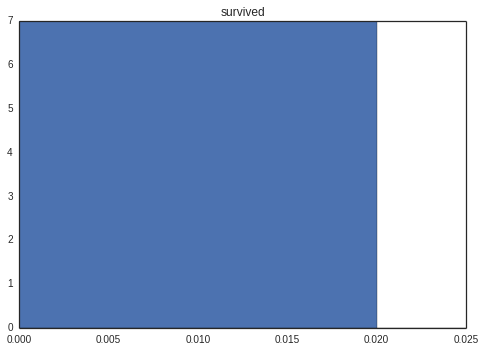

In [163]:
for emb in set(titanic["sibsp"]):
    print emb
    titanic.loc[(titanic["sibsp"] == emb)].hist(column="survived", bins=50, grid=False)

In [164]:
titanic['sex'] = titanic['sex']=="male"

In [165]:
def survived(row):
    # Note: if you want to do some cleaning do it here
    # Note: don't use Survived column :)
    if row['embarked'] == 'N': return True;
    if row['sibsp'] > 4: return False;
    if row['sex'] == 1:
        if row['age'] < 15 or row['age'] > 75:
            return True
        else:
            return False
    else:
        return True

In [166]:
# Slightly better rule
def survived2(row):
    return row['sex'] == 0

In [167]:
# 2. Evaluate
def evaluate(rule):
    acc_train, acc_test = 0., 0.
    for _, row in titanic.iterrows():
        acc_train += (rule(row) == row['survived'])

    print "Accuracy train = {}".format(acc_train/len(titanic))

In [168]:
print titanic.groupby("survived")['sex'].value_counts() # Hey value_counts works! Awesome

survived  sex  
0         True     468
          False     81
1         False    233
          True     109
dtype: int64


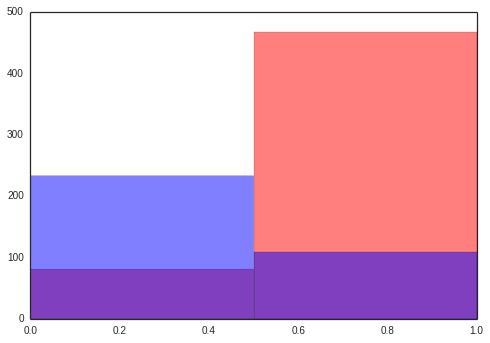

In [169]:
# Differently
c=["red", "blue"]
for value, df in titanic.groupby("survived")['sex']:
    df.hist(alpha=0.5, grid=False, color=c[value], bins=2)

In [170]:
evaluate(survived)

Accuracy train = 0.800224466891


In [171]:
evaluate(survived2)

Accuracy train = 0.786756453423
